# **Rede Neural Simples**

**Importando os dados com Pandas**

In [23]:
import pandas as pd
df = pd.read_excel("/content/sample_data/teste00.xlsx")
print(df)

     x1   x2   y  tt
0   0.0  0.0   0  tr
1   0.0  2.0   2  tr
2   0.0  4.0   4  tr
3   0.0  6.0   6  tr
4   2.0  0.0   2  tr
5   2.0  2.0   4  tr
6   2.0  4.0   6  tr
7   2.0  6.0   8  tr
8   4.0  0.0   4  tr
9   4.0  2.0   6  tr
10  4.0  4.0   8  tr
11  4.0  6.0  10  tr
12  6.0  0.0   6  tr
13  6.0  2.0   8  tr
14  6.0  4.0  10  tr
15  6.0  6.0  12  tr
16  1.0  1.0   2   v
17  1.0  3.0   4   v
18  1.0  5.0   6   v
19  3.0  1.0   4   v
20  3.0  3.0   6   v
21  3.0  5.0   8   v
22  5.0  1.0   6   v
23  5.0  3.0   8   v
24  5.0  5.0  10   v
25  1.5  1.5   3  tt
26  1.5  2.5   4  tt
27  1.5  3.5   5  tt
28  1.5  4.5   6  tt
29  2.5  1.5   4  tt
30  2.5  2.5   5  tt
31  2.5  3.5   6  tt
32  2.5  4.5   7  tt
33  3.5  1.5   5  tt
34  3.5  2.5   6  tt
35  3.5  3.5   7  tt
36  3.5  4.5   8  tt
37  4.5  1.5   6  tt
38  4.5  2.5   7  tt
39  4.5  3.5   8  tt
40  4.5  4.5   9  tt


In [24]:
X_train = df.iloc[0:16,0:2].astype(float)
y_train = df.iloc[0:16,2].astype(float)
X_valid = df.iloc[16:25,0:2].astype(float)
y_valid = df.iloc[16:25,2].astype(float)
X_test = df.iloc[25:41,0:2].astype(float)
y_test = df.iloc[25:41,2].astype(float)
#print(X_test)

**Importando TensorFlow e NumPy**

In [34]:
from tensorflow import random
from tensorflow.keras import layers, models, optimizers
import numpy as np #Manipução de Arrays

**Inicializando semente aleatoria**

In [54]:
seed = 123
np.random.seed(seed)
random.set_seed(seed)

**Criando modelo da Rede Neural (multicamadas)**

In [55]:
model = models.Sequential()

#Camada de Entrada & Camada Escondida_1
model.add(layers.Dense(10, activation='sigmoid', input_dim=2))

#Camada de Saida
model.add(layers.Dense(1, activation='linear'))

#Resumo do Modelo
#model.summary()

**Definição do algoritmo de aprendizado**

In [56]:
#Tipo de Otimizador
optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.5)
model.compile(loss='mse', optimizer=optimizer)

**Treinamento da Rede Neural**

In [57]:
history = model.fit(X_train, y_train, epochs=400, batch_size=1, validation_data=(X_valid, y_valid),
          shuffle=True, verbose=0)

**Plotando historico de treinamento**

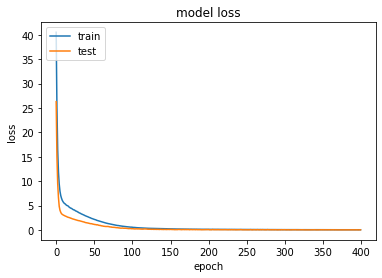

In [61]:
import matplotlib.pyplot as plt #Para Gerar Plots

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Utilizando a Rede Neural treinada**

In [58]:
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

**Medidas de performance**

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', mean_absolute_error(y_test, y_pred))  
print('MSE:', mean_squared_error(y_test, y_pred))  
print('R2_Score:', r2_score(y_test, y_pred))

MAE: 0.21185970306396484
MSE: 0.054850635333849596
R2_Score: 0.9780597458664602


**Arrumando os dados para imprimir y_pred e y_test**

In [77]:
y_t = np.array(y_test).reshape(y_test.shape[0],)
y_p = np.array(y_pred).reshape(y_pred.shape[0],)
df_cmp = pd.DataFrame({'y_test':y_t, 'y_pred':y_p})
df_cmp

,y_test,y_pred
0,3.0,2.957965
1,4.0,4.067776
2,5.0,5.153029
3,6.0,6.165668
4,4.0,4.054101
5,5.0,5.187267
6,6.0,6.280251
7,7.0,7.281840
8,5.0,5.141706
9,6.0,6.276949


**Plotando y_pred e y_test**

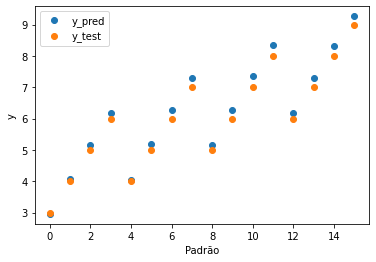

In [78]:
plt.plot(range(16),y_pred, 'o')
plt.plot(range(16), y_test, 'o')
plt.ylabel('y')
plt.xlabel('Padrão')
plt.legend(['y_pred', 'y_test'], loc='upper left')
plt.show()

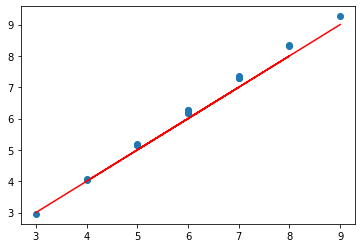

In [79]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')